<a href="https://colab.research.google.com/github/cwhowe/QRN_Scalability/blob/main/Equation_solving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Defining all of the equations for F

#Global variables

P2 = .99 #noise parameter
eta = .99 #noise parameter
L_0 = 0.542 #attenuation length in km

def F(n_E,n_L,F_0,N): 
  return g(n_E,F1(n_L,F_0,N))

def F1(n_L,F_0,N):
  return S(F_L(n_L,F_0),N)

def F_L(n_L,F_0):
  return g(n_L,F_0)

def S(F,N):
  return ((1/4) + (3/4)*(P2*(4*eta**2 - 1)*(1/3))**(N-1) * ((4*F - 1)/3)**N)   

def g(n,F):
  if (n==0):
    return F
  else:
    return g(n-1,f(F))

def f(F):
  return (A(F)*B(eta) + C(F)*D(eta) + E(P2))/(H(F)*B(eta) + C(F)*4*D(eta) + 4*E(P2))

def A(F):
  return (F**2 + ((1/3)*(1-F))**2)
def B(eta):
  return (eta**2 + (1-eta)**2)
def C(F):
  return (F*(1/3)*(1-F) + ((1/3)*(1-F))**2)
def D(eta):
  return (2*eta*(1-eta))
def E(P2):
  return (1-P2**2)/(8*P2**2)
def H(F):
  return F**2 + (2/3)*F*(1-F) + (5/9)*(1-F)**2

In [ ]:
#Defining all of the equations for R

def F_j(n_L,F,N,j):
  return g(j-1, F1(n_L,F,N))

def P(F):
  return (P2**2 * (H(F)*B(eta) + C(F)*4*D(eta) + 4*E(P2)))

def R_L(R_0,n_L,d,F_0):
  denom = 1
  for j in range (1,n_L):
    denom*= (2/P(F_L(j-1,F_0)))
  numer = R_0 * np.exp(-d/L_0)
  return (numer/denom)

def R(n_E,n_L,N,d,R_0,F_0):
  denom = 1
  for j in range (1,n_E):
    denom*= (2/P(F_j(n_L,F_0,N,j)))
  numer = R_L(R_0,n_L,d,F_0)
  return (numer/denom)

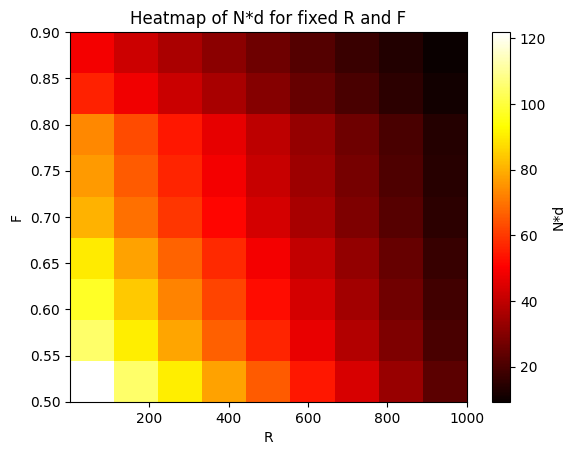

In [ ]:
#Obtaining the plot and solving for N*d

from scipy.optimize import root
from scipy.optimize import fsolve

#Initialized variables

n_E = 1 #number of end-to-end entanglement distillation operations
n_L = 1 #number of link-level entanglement distillation operations
F_0 = .99 # initial LLE state fidelity
R_0 = 10**5 #initial attempt EGR

#Defining the points over which we will plot the functions (what values we fix R and F to)

fixed_R = np.array([1,5,10,20,50,75,100,500,1000])
fixed_F = np.array([.5,.55,.6,.65,.7,.75,.8,.85,.9])
Nd_result = np.zeros((len(fixed_R), len(fixed_F)))

#Find and add N*d value corresponding to each pair of R,F 

for i, fix_R in enumerate(fixed_R):
    for j, fix_F in enumerate(fixed_F):
        def constraint(var):
            N, d = var
            R_fixed = fix_R
            F_fixed = fix_F
            return [R(n_E, n_L, N, d, R_0, F_0) - R_fixed, F(n_E, n_L, F_0, N) - F_fixed]
        N0 = 1
        d0 = 1
        N_sol, d_sol = fsolve(constraint, [N0, d0])
        N_d_new = N_sol * d_sol
        Nd_result[i, j] = N_d_new

#Plotting in form of a heat map

plt.imshow(Nd_result, cmap='hot', interpolation='nearest', extent=[fixed_R.min(), fixed_R.max(), fixed_F.min(), fixed_F.max()], origin='lower', aspect='auto')
plt.colorbar(label='N*d')
plt.xlabel('R')
plt.ylabel('F')
plt.title('Heatmap of N*d for fixed R and F')
plt.show()